In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [6]:
from keras import Sequential
model = Sequential([
    Conv2D(64, (3, 3), activation = "relu", input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4599 - accuracy: 0.8312
Epoch 2/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3089 - accuracy: 0.8871
Epoch 3/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2654 - accuracy: 0.9006
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2356 - accuracy: 0.9122
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2651 - accuracy: 0.9019


In [8]:
test_loss

[0.26505035161972046, 0.9018999934196472]

By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image

## About overfitting

### Visualizing the Convolutions and Pooling

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models



In [5]:
model.layers

In [7]:
model.layers[0].__dir__()

['_self_setattr_tracking',
 '_instrumented_keras_api',
 '_instrumented_keras_layer_class',
 '_instrumented_keras_model_class',
 '_trainable',
 '_stateful',
 '_input_spec',
 '_build_input_shape',
 '_saved_model_inputs_spec',
 '_saved_model_arg_spec',
 '_supports_masking',
 '_name',
 '_activity_regularizer',
 '_trainable_weights',
 '_non_trainable_weights',
 '_updates',
 '_thread_local',
 '_callable_losses',
 '_losses',
 '_metrics',
 '_metrics_lock',
 '_dtype_policy',
 '_compute_dtype_object',
 '_autocast',
 '_self_tracked_trackables',
 '_inbound_nodes_value',
 '_outbound_nodes_value',
 '_expects_training_arg',
 '_default_training_arg',
 '_expects_mask_arg',
 '_dynamic',
 '_batch_input_shape',
 '_initial_weights',
 '_auto_track_sub_layers',
 '_preserve_input_structure_in_config',
 '_outer_name_scope',
 '_obj_reference_counts_dict',
 'rank',
 'filters',
 'groups',
 'kernel_size',
 'strides',
 'padding',
 'data_format',
 'dilation_rate',
 'activation',
 'use_bias',
 'kernel_initializer',
 

In [11]:
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d')>

In [10]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

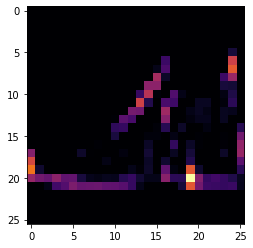

In [46]:
layer_1 = model.layers[0]
activation_layer1 = tf.keras.models.Model(inputs = model.input, outputs = layer_1.output)
f1 = activation_layer1.predict(test_images[0].reshape(1, 28, 28, 1))
import matplotlib.pyplot as plt
plt.imshow(f1[0, : , :, 1], cmap='inferno')

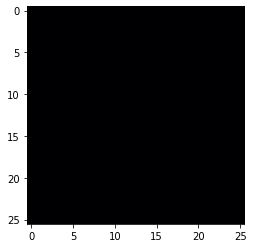

In [48]:
plt.imshow(f1[0, : , :, 2], cmap='inferno')



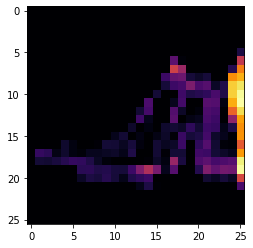

In [49]:
plt.imshow(f1[0, : , :, 3], cmap='inferno')

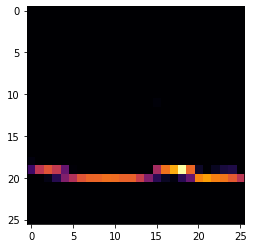

In [50]:
plt.imshow(f1[0, : , :, 4], cmap='inferno')

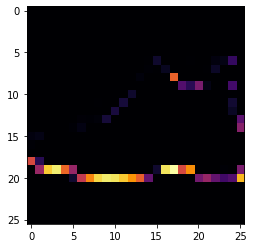

In [51]:
plt.imshow(f1[0, : , :, 5], cmap='inferno')

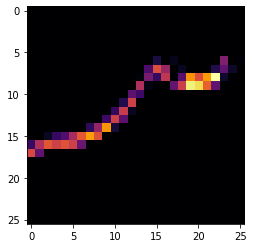

In [52]:
plt.imshow(f1[0, : , :, 6], cmap='inferno')

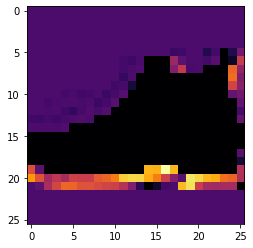

In [53]:
plt.imshow(f1[0, : , :, 7], cmap='inferno')

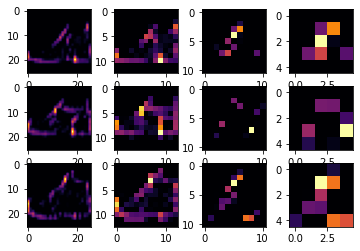

In [54]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)